# Descriptive Statistics
- Statistics summarization and describe main features of dataset
- distribution , central tendency(mean, median, mode), variaility (std, var)

1. mean (average):
    - sum of all values divided by total number of values
    - sensitive to outliers(extrem values can skew the mean)


2. median(mid-value):
    - middle value when the data is ordered
    - or the average of the two middle values of an even number of observation
    - robust to outliers ,making it better measure of central tendency for skewed distribution
3. mode(frequency):
    - value(s) that apear most frequently in the dataset
    - useful for categorical data or to identify the most common values in numeric data
    - a dataset can be unimodel(one mode), bimodel, multi_model
      
4. Varience:
    - measures how spread out the data points are from the mean
    - high variance indicates greater spread , low varience indicates data points closer to the mean
      
5. Standard Deviation
    -square root of variance, expressed in the same units as the data
    - a smaller std means data is tightly clustered around the mean
   


In [2]:
import pandas as pd
import seaborn as sns


In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
print('mean',iris['petal_length'])

mean 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64


In [5]:
mean=iris['petal_length'].mean()
median=iris['petal_length'].median()
mode=iris['petal_length'].mode()[0]
var=iris['petal_length'].var()
std=iris['petal_length'].std()

In [11]:
print("mean :",mean)
print("median :",median)
print("mode :",mode)
print("var :",var)
print("std :",std)

mean : 3.7580000000000005
median : 4.35
mode : 1.4
var : 3.1162778523489942
std : 1.7652982332594667


# interpretation
- mean(3.76) : the average petal length is about 3.76 cm , but this may be influenced by outliners or skewness.
- median(4.35) : the middle value is higher than mean ,suggesting a left- skew distribution (more smaller values).
- mode(1.4): the most frequent petal length is around 1,5cm
- var(3.12)and std(1.77) :  the data has  moderate spread with most petal lemgth with +- 1.77cm of the mean

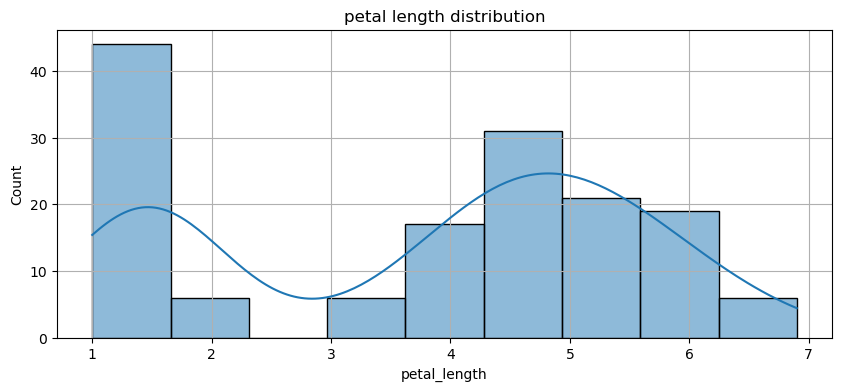

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.histplot(iris, x="petal_length",kde=True).set_title('petal length distribution')
plt.grid()
plt.show()

<Axes: xlabel='petal_length'>

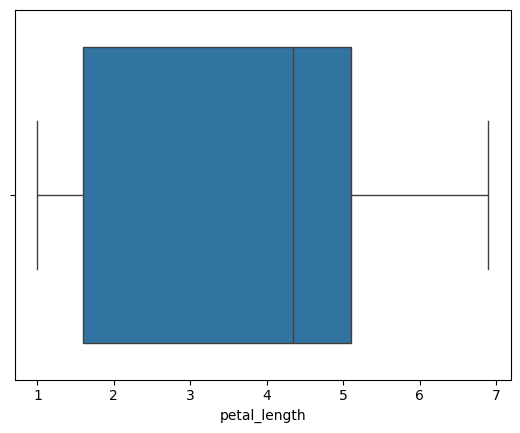

In [16]:
sns.boxplot(iris,x='petal_length')

# correlation
- correlation measures the strength and direction of linear relationship between two variables(continuous)
- it is a standaedized metric that ranges from -1 to +1
- -1: perfect negative correlation
- 0: no correlation
- +1: perfect positive correlation 

In [17]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
iris['sepal_length'].corr(iris['petal_length'])

np.float64(0.8717537758865831)

In [20]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


In [24]:
corr_matrix=iris.drop(columns='species').corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


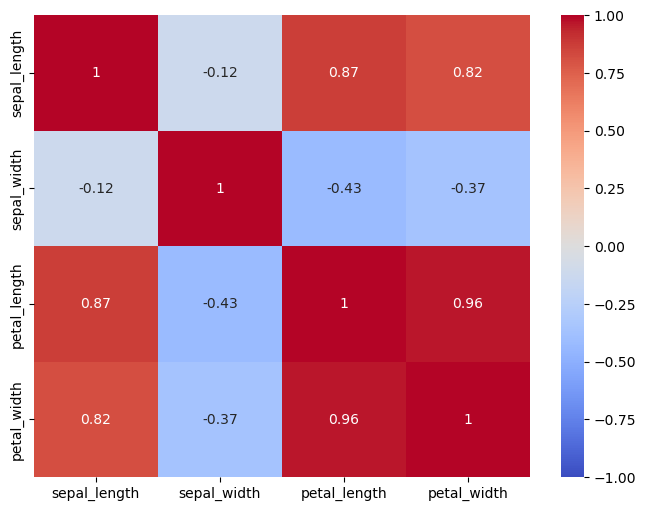

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

# interperpretation
- the correlation of -0.96 indicates a strong linear relationship between_petal_length and petal_width, meaning petal_length  is a good predictior of petal_width in a linear model

# coveriance  
- # - it measures how two variables change together . it indicates the direction of the relationship but not its strength or scale 
- positive : in crease together 
-  negative : one vairable increases the other decreases 
 - zero no consistent variable

In [28]:
matrix=iris[['sepal_length','petal_length']].cov()
matrix

,sepal_length,petal_length
sepal_length,0.685694,1.274315
petal_length,1.274315,3.116278


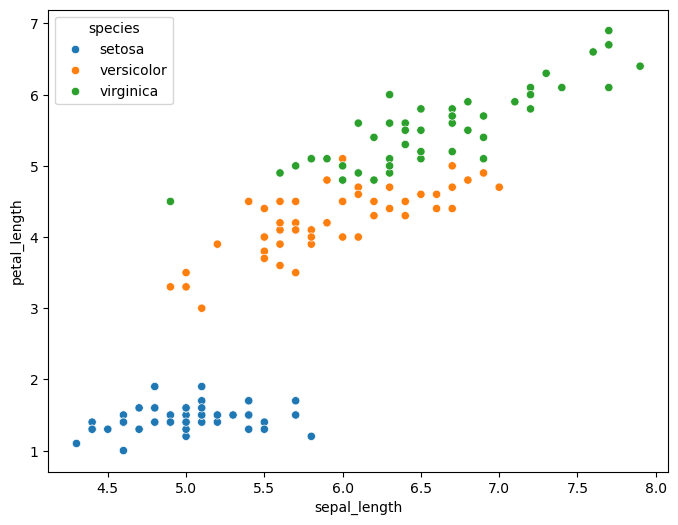

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris,x='sepal_length',y='petal_length',hue='species')
plt.show()

In [31]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [33]:
new=tips['total_bill'].corr(tips['tip'])
new

np.float64(0.6757341092113641)

In [36]:
matrix=tips[['total_bill','tip']].corr()
matrix

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


# interpretation
- it shows moderate correlation between total_bill and tip

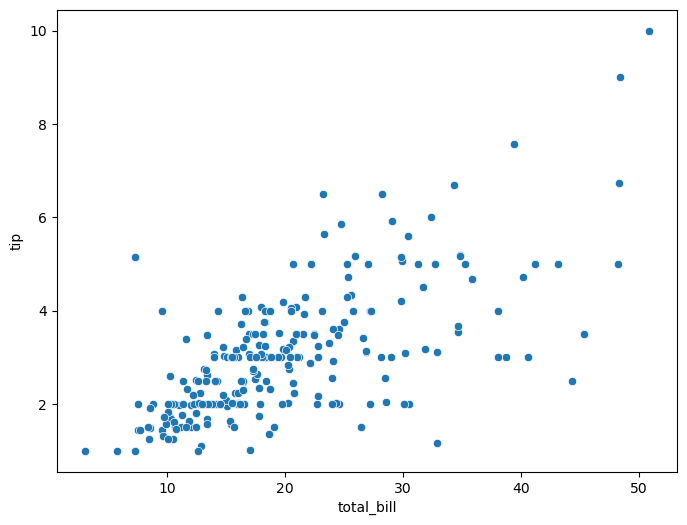

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(tips,x='total_bill',y='tip')
plt.show()

In [4]:
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
new=titanic[['fare','survived']].corr()
new

,fare,survived
fare,1.000000,0.257307
survived,0.257307,1.000000
